# PYBD - Top 100 Billboard USA

In [1]:
from collections import Counter

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Importing the data and setting up dtypes

In [2]:
df = pd.read_csv('data/top_100_billboard_usa.csv')
df["date"] = pd.to_datetime(df["date"])

In [3]:
list(df.columns)

['date', 'rank', 'song', 'artist', 'last-week', 'peak-rank', 'weeks-on-board']

In [4]:
df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [5]:
len(df)

330087

## Tools

In [6]:
def to_year_df(df: pd.DataFrame):
    df = df.copy()
    df["date"] = df["date"].dt.year
    return df

In [7]:
def to_decade(year):
    decade = year//10 * 10
    return decade

In [8]:
def to_decade_df(df: pd.DataFrame):
    df = df.copy()
    df["date"] = df["date"].dt.year.apply(to_decade)
    return df

## Data exploration

In [9]:
print(f"Number of artists: {len(df['artist'].unique())}")

Number of artists: 10205


In [10]:
nb_year = df.date.max().year - df.date.min().year
print(f"Timescale of the dataset (approximately, in years): {nb_year}")

Timescale of the dataset (approximately, in years): 63


In [11]:
df_date_year = df["date"].dt.year.unique()
mini = df_date_year.min()
maxi = df_date_year.max()
artistes_distincts = len(df["artist"].unique())
unique_songs = len(df["song"].unique())
print(f"Number of distinct artists in the top 100 each week between {mini} and {maxi} ({maxi - mini} years):")
print(f"  {artistes_distincts} with {unique_songs} musics for {len(df)} entries")

Number of distinct artists in the top 100 each week between 1958 and 2021 (63 years):
  10205 with 24620 musics for 330087 entries


In [12]:
print(f'Number of songs: {len(df.groupby(["artist", "song"]))}')

Number of songs: 29681


In [13]:
print(f"There is {artistes_distincts / (maxi - mini)} new artists each year")

There is 161.984126984127 new artists each year


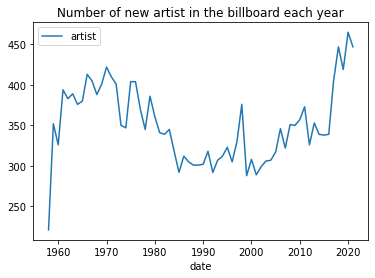

In [14]:
to_year_df(df)[["date", "artist"]].groupby(["date", "artist"], as_index=False).first().groupby("date").count().plot()
plt.title("Number of new artist in the billboard each year")
plt.show()

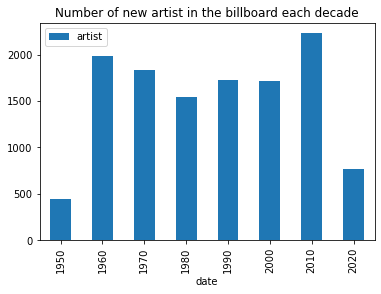

In [15]:
to_decade_df(df)[["date", "artist"]].groupby(["date", "artist"], as_index=False).first().groupby("date").count().plot.bar()
plt.title("Number of new artist in the billboard each decade")
plt.show() # Lows in 2020 and 1950 are because the decade was/is not complete

In [16]:
songdf = df[['song', "artist"]].value_counts()
songdf # Songs that appear the most in the billboard

song                      artist                      
Blinding Lights           The Weeknd                      90
Radioactive               Imagine Dragons                 87
Sail                      AWOLNATION                      79
I'm Yours                 Jason Mraz                      76
How Do I Live             LeAnn Rimes                     69
                                                          ..
I Won't Give Up           Jana Kramer                      1
I Won't Back Down         Blake Shelton & Dia Frampton     1
I Will Always Love You    Glee Cast                        1
I Who Have Nothing        Jordin Sparks                    1
Trap This Way (This Way)  Lil Uzi Vert                     1
Length: 29681, dtype: int64

In [17]:
df[["artist", "song"]].groupby(["artist","song"], as_index=False).first().groupby(["song"], as_index=True).count().sort_values(by="artist", ascending=False)
# Song titles that are most used by artists

,artist
song,
Hold On,17
You,15
Stay,15
Forever,14
Angel,14
...,...
I Can Never Go Home Anymore,1
I Can Make It Thru The Days (But Oh Those Lonely Nights),1
I Can Make It Better,1


In [18]:
df.groupby(["artist","song"], as_index=False).first().groupby("artist")["song"].count().sort_values(ascending=False)
# Artists that have the most songs in the billboard

artist
Glee Cast                                                                    183
Taylor Swift                                                                 120
Drake                                                                        108
The Beatles                                                                   65
Aretha Franklin                                                               64
                                                                            ... 
Jibbs Featuring Chamillionaire                                                 1
Jibbs                                                                          1
Jhene Aiko Featuring Swae Lee Or Rae Sremmurd                                  1
Jhene Aiko Featuring H.E.R.                                                    1
will.i.am Featuring Miley Cyrus, French Montana, Wiz Khalifa & DJ Mustard      1
Name: song, Length: 10205, dtype: int64

In [19]:
df[df['rank']==1][['artist', 'song']].value_counts()
# Songs that have been the longest in rank 1 of the billboard

artist                                             song                  
Lil Nas X Featuring Billy Ray Cyrus                Old Town Road             19
Luis Fonsi & Daddy Yankee Featuring Justin Bieber  Despacito                 16
Mariah Carey & Boyz II Men                         One Sweet Day             16
Mariah Carey                                       We Belong Together        14
Whitney Houston                                    I Will Always Love You    14
                                                                             ..
Ringo Starr                                        Photograph                 1
Rihanna Featuring Drake                            What's My Name?            1
Glen Campbell                                      Southern Nights            1
Rihanna Featuring Britney Spears                   S&M                        1
matchbox twenty                                    Bent                       1
Length: 1131, dtype: int64

In [20]:
df_10 = df[df["rank"] <= 10].copy()
df_10["artist"].value_counts()
# Top 10 artists in the billboard

Mariah Carey                                          233
Madonna                                               213
The Beatles                                           203
Whitney Houston                                       161
Bruno Mars                                            150
                                                     ... 
Ariana Grande & Social House                            1
Post Malone Featuring Ozzy Osbourne & Travis Scott      1
Doja Cat                                                1
Case & Joe                                              1
Tony Camillo's Bazuka                                   1
Name: artist, Length: 2487, dtype: int64

In [21]:
counter = Counter(" ".join(df["song"]).split()).most_common()
pd.DataFrame.from_records(counter, columns=["word", "count"])
# Most common words in the billboard

,word,count
0,The,39638
1,You,34113
2,I,25289
3,Love,23953
4,Me,21005
...,...,...
11944,Pickle,1
11945,Midnighter,1
11946,Barbecue,1
11947,Op,1


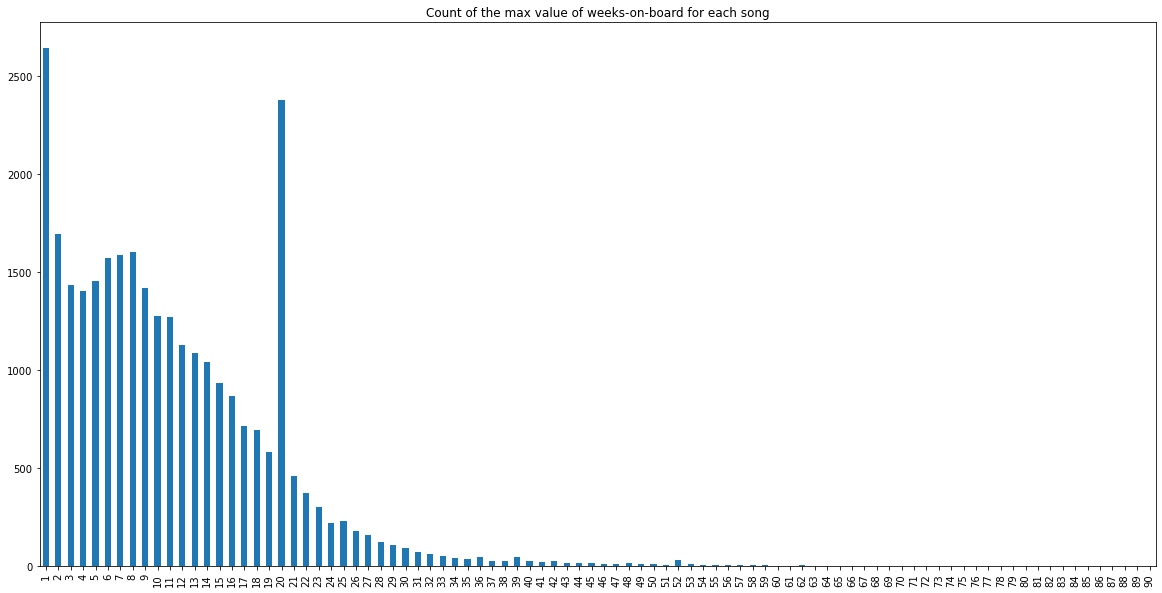

In [22]:
max_weeks_on_board = df.groupby(by=["artist", "song"])["weeks-on-board"].max().value_counts()
max_weeks_on_board.reindex(list(range(1,max_weeks_on_board.index.max()+1)),fill_value=0).plot.bar(figsize=(20, 10))
plt.title("Count of the max value of weeks-on-board for each song")
plt.show()

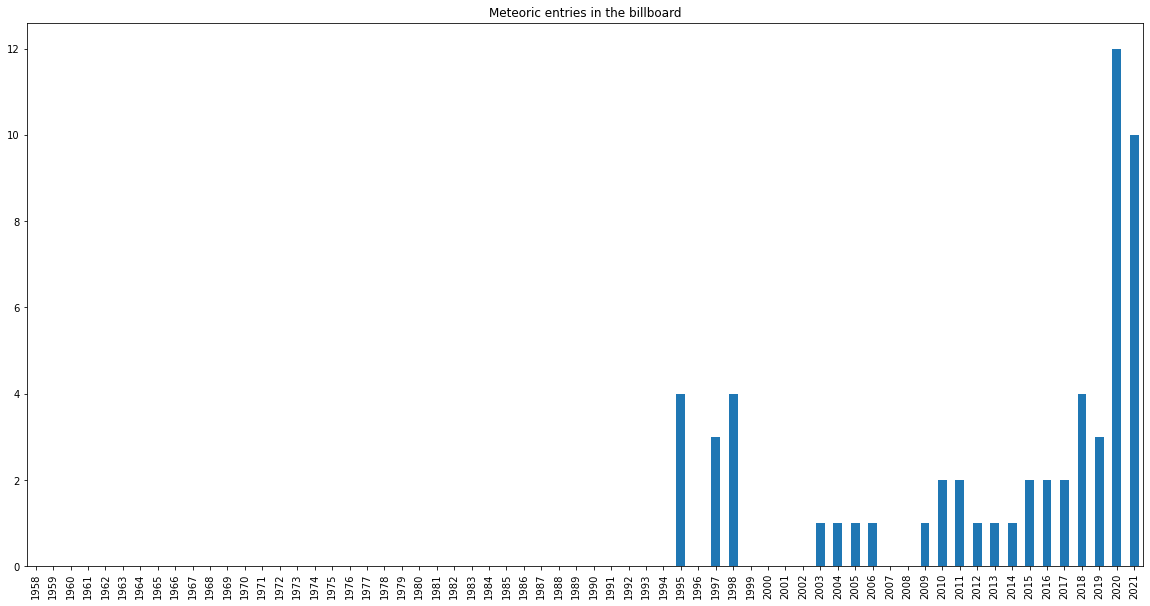

In [23]:
# https://www.insider.com/every-no-1-song-debut-billboard-hot-100
df_high = df[(df["rank"] == 1) & (df["last-week"].isnull()) & (df["weeks-on-board"] == 1) & (df["date"] != "1958-08-04 00:00:00")]
df_high["date"].dt.year.value_counts().sort_index().reindex(range(df.date.dt.year.min(), df.date.dt.year.max() + 1)).plot.bar(figsize=(20,10))
plt.title("Meteoric entries in the billboard")
plt.show()

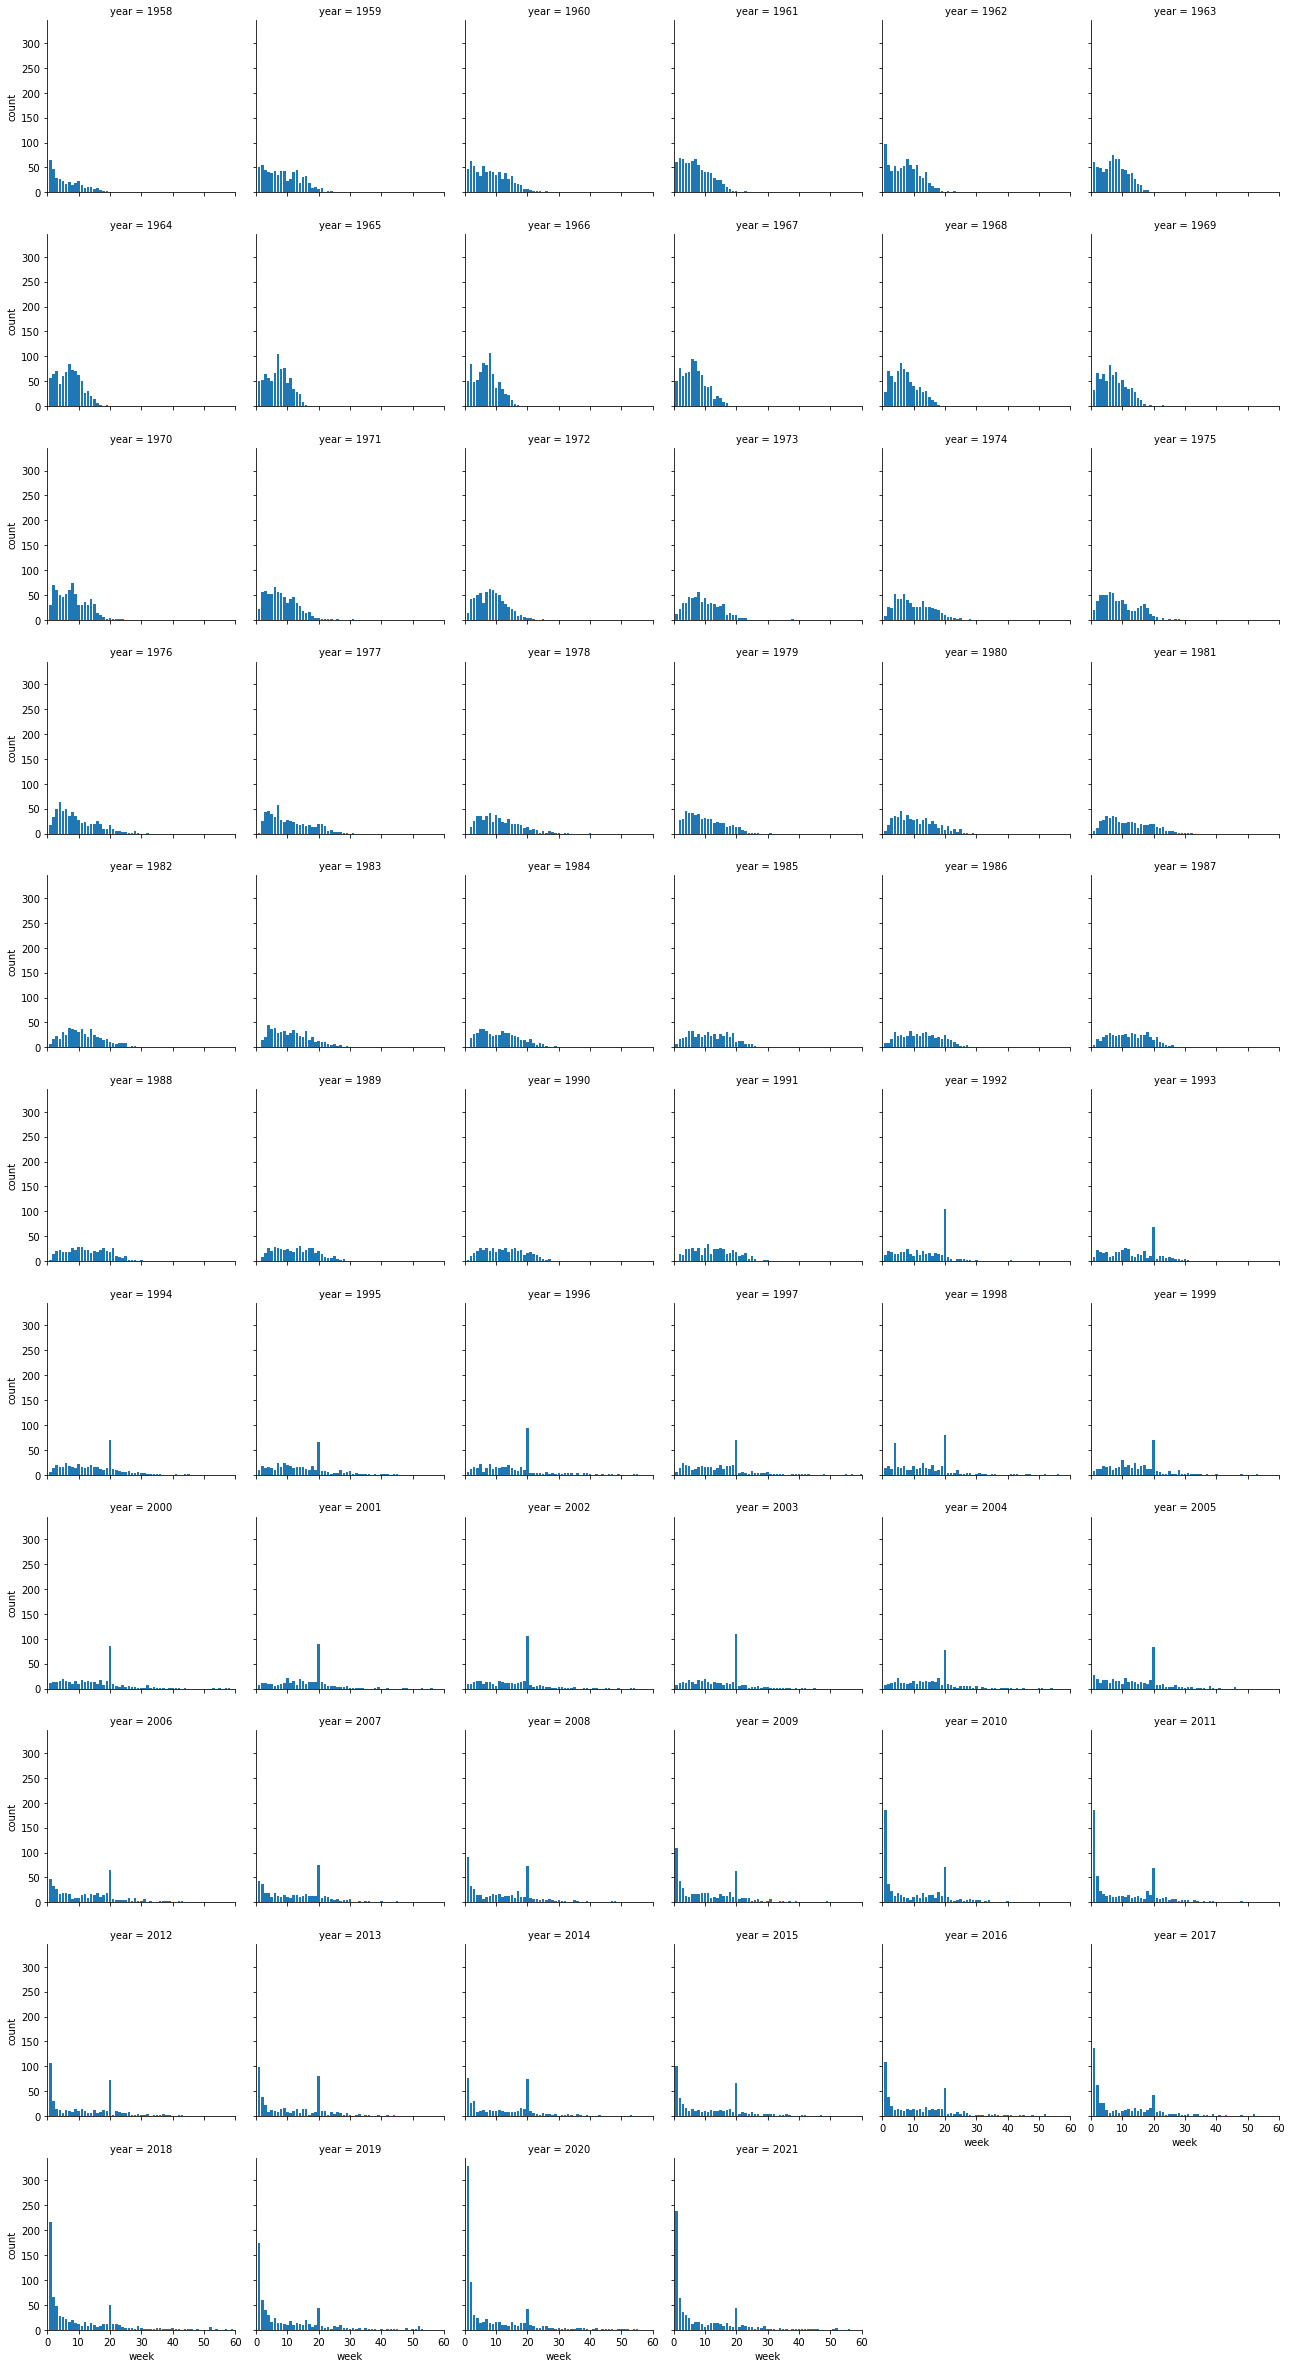

In [24]:
tmp_year_list = []
for year in sorted(df.date.dt.year.unique(), reverse=False):
    df_tmp = df[df["date"].dt.year == year]
    max_weeks_on_board_count = df_tmp.groupby(by=["artist", "song"])["weeks-on-board"].max().value_counts()
    max_weeks_on_board_count = max_weeks_on_board_count.reindex(
                list(range(1, max_weeks_on_board_count.index.max() + 1)),
                fill_value=0
            )

    for week, count in max_weeks_on_board_count.items():
        tmp_year_list.append((year, week, count))

weeks_on_board_year = pd.DataFrame(data=tmp_year_list, columns=["year", "week", "count"])
weeks_on_board_year = weeks_on_board_year.sort_values(["year", "week"], ascending=True)
sns.FacetGrid(weeks_on_board_year, col="year", col_wrap=6, xlim=[0,60]).map(plt.bar, "week", "count").add_legend()
plt.show()

In [25]:
def show_music_of_artist(df, artist):
    """
    Plots may not display if the notebook is not trusted
    """
    df_selected_artist = df[df["artist"] == artist]
    fig = go.Figure()

    fig.update_yaxes(range=[100, 0])
    fig.update_layout(
        #title=f"Songs ranking by {artist}",
        height=800,
        xaxis_title="Date",
        yaxis_title="Classement",
        legend={
            "font": {"size": 7},
        }
    )
    
    for song in df_selected_artist["song"].unique():
        filtered_song_df = df_selected_artist[df_selected_artist["song"] == song].copy()
        tmp = go.Scatter()
        fig.add_scatter(
            x=filtered_song_df["date"],
            y=filtered_song_df["rank"],
            name=song,
            mode='lines+markers',

        )

    return fig

In [26]:
show_music_of_artist(df, "Michael Jackson")

In [27]:
show_music_of_artist(df, "The Weeknd")

In [28]:
show_music_of_artist(df, "Taylor Swift")